# Mission 4


- 아래의 데이터는 온라인 유아용품 고객 및 결제에 대한 데이터입니다. 회원 등록할 때, 회원의 연령, 성별과 같은 기본정보를 수집한 **고객 데이터**가 있습니다. 그리고 각 회원이 매장에서 결제를 진행할 때, 한 제품을 바코드에 찍을 때 마다 발생하는 **결제 데이터**가 존재합니다. 이 두가지 데이터를 이용해서, 아래의 미션을 수행해 봅시다.   
**(실제 회사의 데이터이므로, 절대 유출 금지)**
  

  
    
    
- ### 금번 미션에서는 RFM분석 기법에 대해 간단하게 배워볼 수 있는 문제가 준비되어 있습니다. (해당 문제는 선택 사항)
- 먼저 개인 스스로 풀어보고, 풀지 못한 미션은 팀원들과 같이 풀어보세요.
- Chat GPT + 교재 + 팀스터디 모두 활용하여 풀어보시길 바랍니다. 
- 미션 미제출시, 수료증 발급에 제한이 될 수 있습니다. 
- **시험기간을 고려하여 제출 기한을 월말로 늘렸습니다.**
- **기한 : 24년 12월 31일 23시 59분까지 / 이후 제출 절대 인정 불가**  
- 제출처: weit2024.project@gmail.com

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
#
#Set font to "Malgun Gothic"
rc('font', family='Malgun Gothic')

1. Member_data02.csv 데이터를 df_member 변수로, Sales_data02.csv 데이터를 df_sales변수로 선언하고, 각각의 데이터의 구조와 타입을 확인하시오.

In [4]:
import pandas as pd
df_member = pd.read_csv('Member_data02.csv') #df_member : 고객데이터 // 회원등록할 때 회원의 기본정보
df_sales = pd.read_csv('Sales_data02.csv') #df_sales : 결제 데이터 // 회원이 매장에서 결제 시, 제품의 바코드를 찍을 때마다 발생하는 데이터

df_member.info()
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81094 entries, 0 to 81093
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      81094 non-null  float64
 1   성별      81094 non-null  object 
 2   결혼유무    81094 non-null  object 
 3   거주지역    81094 non-null  object 
 4   연령      81094 non-null  int64  
 5   결제등록카드  81094 non-null  object 
 6   유입경로    81094 non-null  object 
 7   자녀여부    81094 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   주문번호       199999 non-null  object 
 1   구매일        199999 non-null  object 
 2   배송시작일      199999 non-null  object 
 3   배송완료일      199999 non-null  object 
 4   구매시월령(수정)  168142 non-null  float64
 5   ID         199999 non-null  float64
 6   구매금액       19999

2. df_member 데이터에서 자녀 여부가 'Yes'이고 결혼 유무가 '기혼'인 고객의 유입경로를 파이차트로 시각화 하시오.

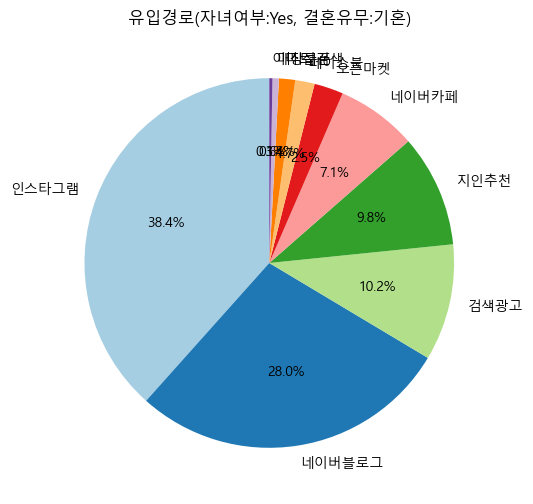

In [6]:
filtered_data = df_member[(df_member['자녀여부'] == 'Yes') & (df_member['결혼유무'] == '기혼')]
path_counts = filtered_data['유입경로'].value_counts()
#파이차트 그리기
plt.figure(figsize = (8,6))
path_counts.plot.pie(autopct = '%1.1f%%', startangle=90, colors = plt.cm.Paired.colors)
plt.title('유입경로(자녀여부:Yes, 결혼유무:기혼)')
plt.ylabel('')
plt.show()

3. 각 거주지역별로 고객 수를 집계하고, 이를 시각화하시오.

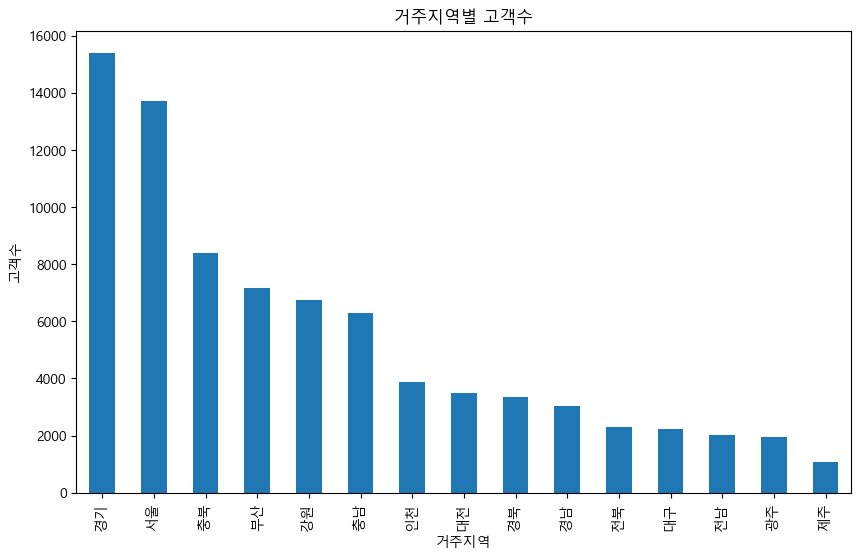

In [8]:
filtered_area = df_member['거주지역'].value_counts()
#print(filtered_area)
plt.figure(figsize = (10,6))
filtered_area.plot.bar()
plt.title('거주지역별 고객수')
plt.xlabel('거주지역')
plt.ylabel('고객수')
plt.show()

4. 결혼 유무와 자녀 여부에 따른 고객 분포를 시각화하시오.

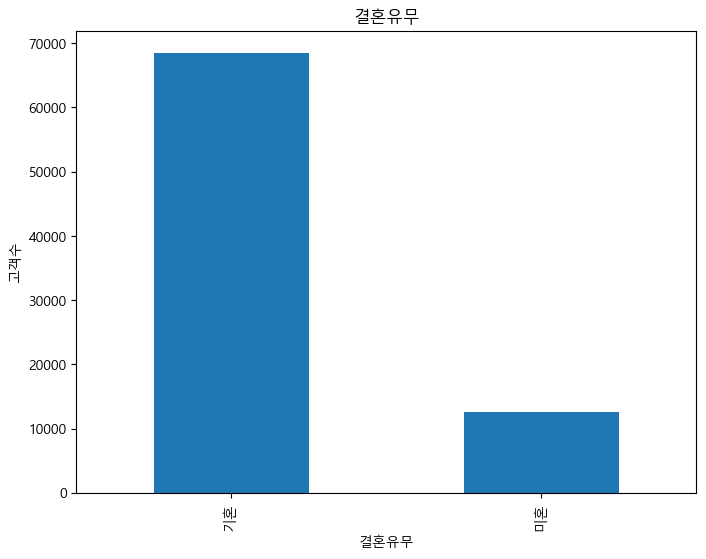

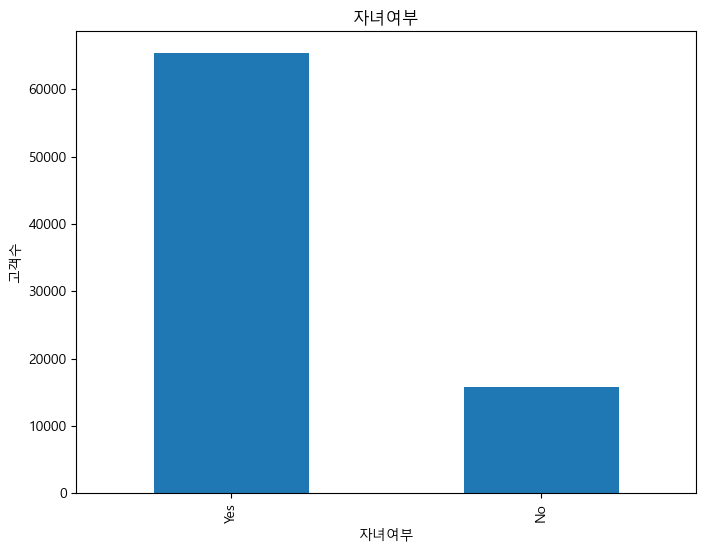

In [10]:
filtered_marriage = df_member['결혼유무'].value_counts()
filtered_children = df_member['자녀여부'].value_counts()

plt.figure(figsize = (8,6))
filtered_marriage.plot.bar()
plt.title('결혼유무')
plt.ylabel('고객수')
plt.show()

plt.figure(figsize = (8,6))
filtered_children.plot.bar()
plt.title('자녀여부')
plt.ylabel('고객수')
plt.show()

5. df_member 데이터에서, 고객의 연령을 5단위로 묶고, '연령대'라는 파생변수를 생성하시오.  
   ex) 21~25, 26~30, 31~35, 36~40.... 

In [12]:
df_member['연령대'] = pd.cut(
    df_member['연령'],
    bins = range(0, 101, 5),
    right = False,
    labels = [f'{i}대' for i in range(0,100,5)]
)

6. 적절한 시각화 기법을 사용해 연령대 별 '결제등록카드'별 빈도수를 시각화 하시오.  

      **(조건: 전체 결제등록카드 중, 가장 빈도수가 높은 상위 6개의 은행(카드)"만 표시되도록)**

In [14]:
import seaborn as sns

C:\Users\kelly\AppData\Local\Temp\ipykernel_37876\1110913279.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  card_by_age = filtered_cards.groupby(['연령대','결제등록카드']).size().reset_index(name = '빈도수')


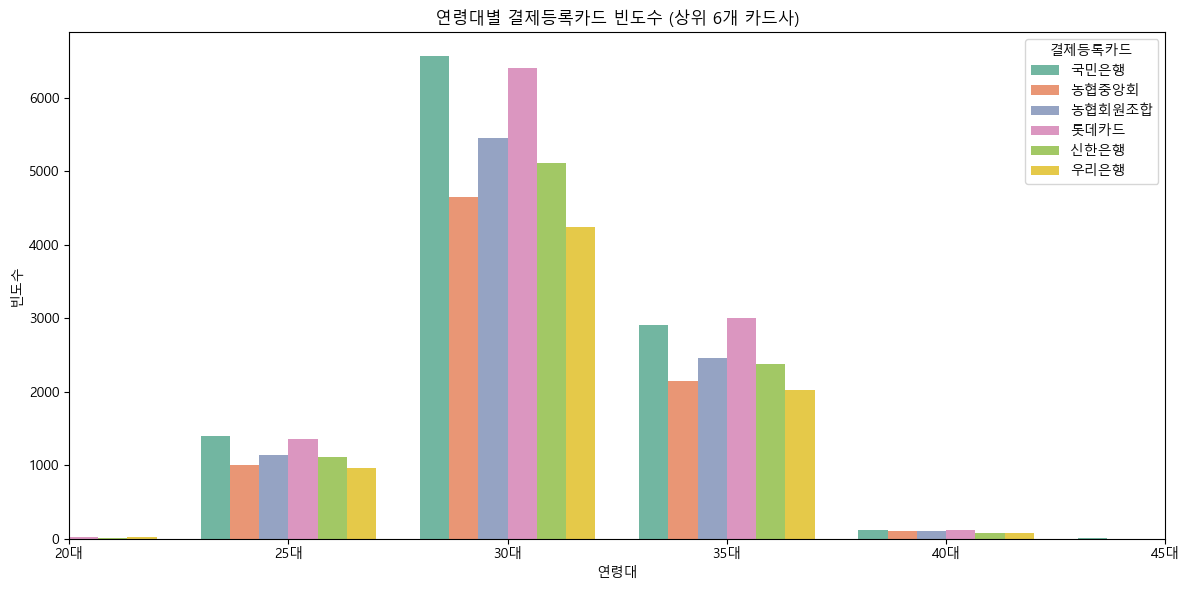

In [15]:
#상위 6개 결제 등록 카드 선택
top_cards = df_member['결제등록카드'].value_counts().head(6).index 
#상위 6개 카드사만 필터링
filtered_cards = df_member[df_member['결제등록카드'].isin(top_cards)]
#연령대별 카드 빈도 계산
card_by_age = filtered_cards.groupby(['연령대','결제등록카드']).size().reset_index(name = '빈도수')

plt.figure(figsize = (12,6))
sns.barplot(
    data = card_by_age, 
    x = '연령대',
    y = '빈도수',
    hue = '결제등록카드',
    palette = 'Set2'
)

plt.title('연령대별 결제등록카드 빈도수 (상위 6개 카드사)')
plt.xlabel('연령대')
plt.ylabel('빈도수')
plt.xlim(4, 9)
plt.legend(title = '결제등록카드')
plt.tight_layout()
plt.show()


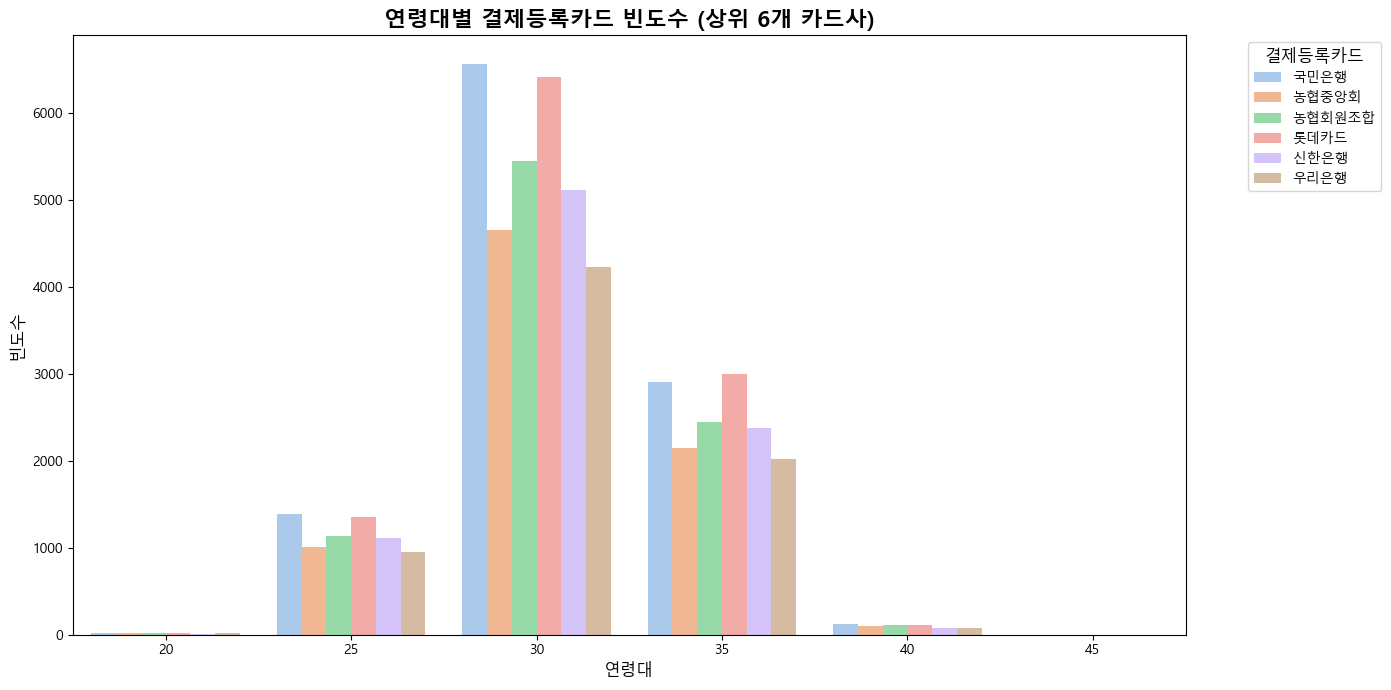

7. 구매 데이터에서 상품 대분류(물품대분류)별로 총 구매 금액(구매금액)을 집계하고, 이를 파이 차트로 시각화하세요.

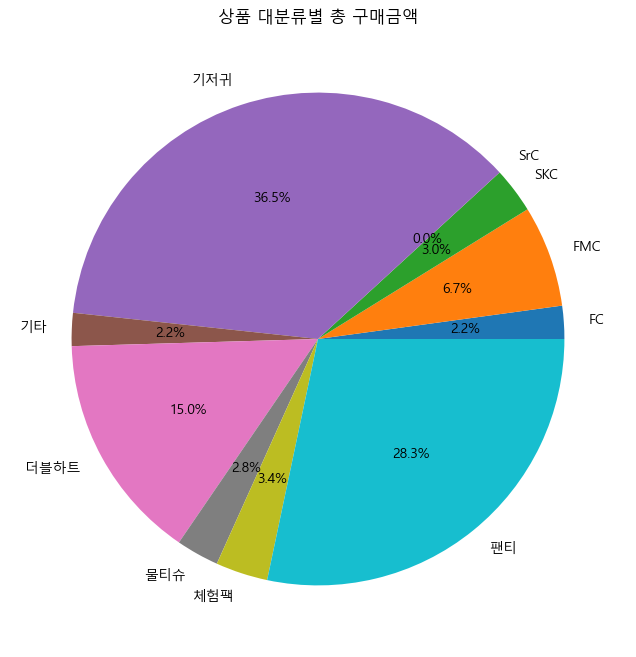

In [18]:
sum_by_product = df_sales.groupby('물품대분류')['구매금액'].sum()

plt.figure(figsize = (8,8))
plt.pie(sum_by_product, labels = sum_by_product.index, autopct = '%1.1f%%')
plt.title('상품 대분류별 총 구매금액')
plt.show()

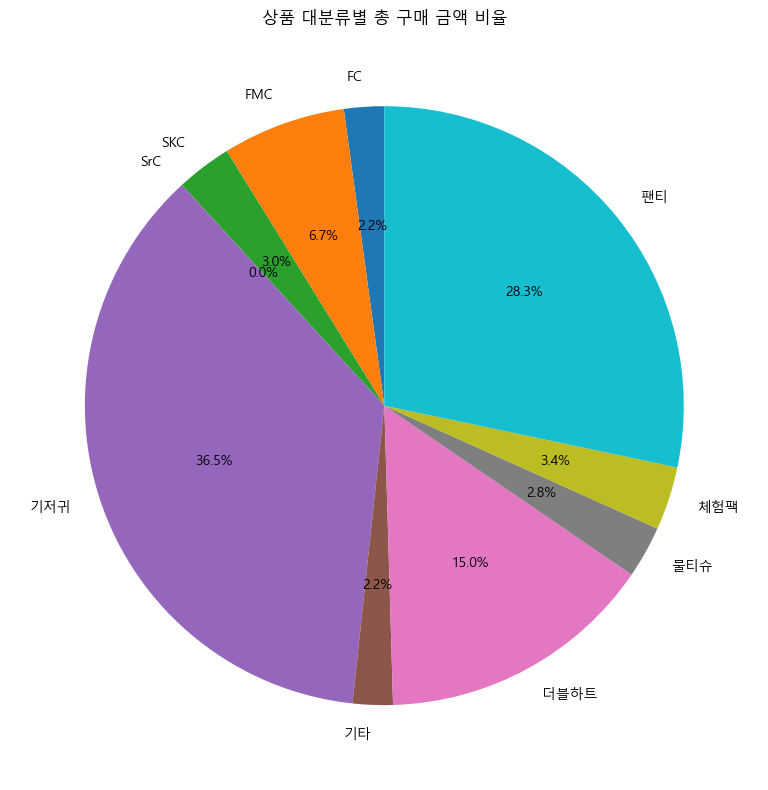

8. 월별 구매 건수의 변화를 분석하고, 이를 시계열 그래프로 표현하세요.

In [21]:
#구매월 파생변수를 만들어서 구매월에 따른 구매건수의 총합을 계산하고
#시계열 그래프로 표현하기

In [22]:
#print(df_sales.dtypes)

In [23]:
#df_sales.head()

In [24]:
df_sales['구매일'] = pd.to_datetime(df_sales['구매일'])
#print(df_sales.dtypes)

In [25]:
df_sales['구매 연도/월'] = df_sales['구매일'].dt.strftime('%Y-%m')

In [26]:
#df_sales.head()

In [27]:
#구매월에 따른 따른 구매 건수의 총합
monthly_count = df_sales['구매 연도/월'].value_counts().sort_index()
#print(monthly_count)

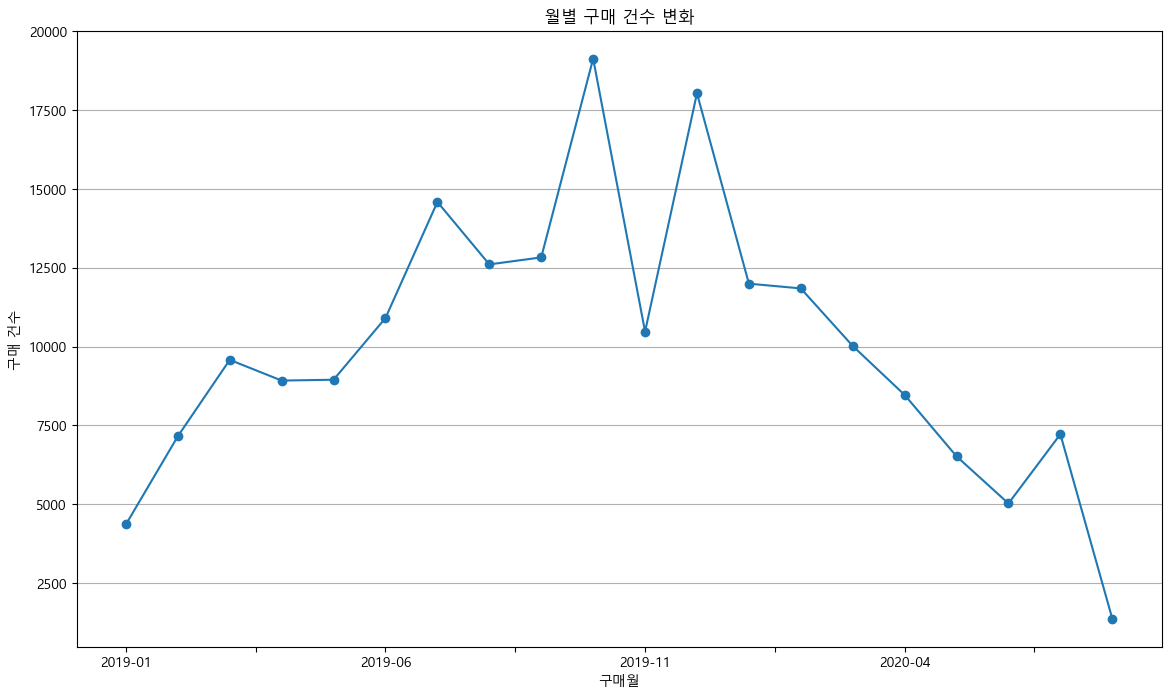

In [28]:
plt.figure(figsize=(14,8))
monthly_count.plot(kind = 'line', marker = 'o', linestyle = '-')
plt.title('월별 구매 건수 변화')
plt.xlabel('구매월')
plt.ylabel('구매 건수')
plt.grid(axis='y')

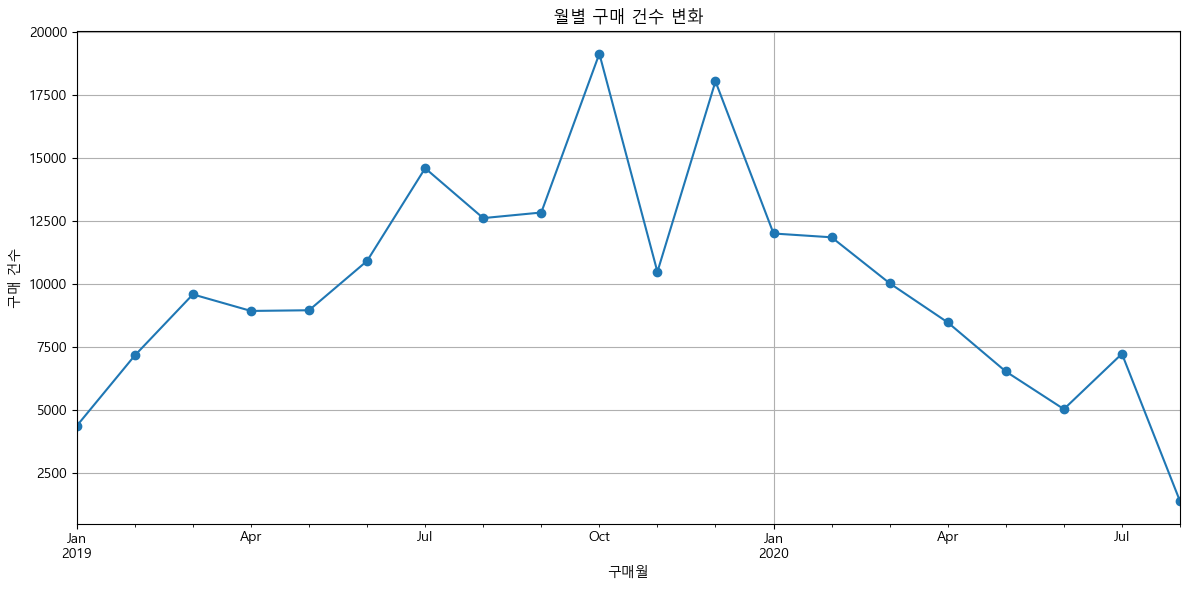

9. 연령대별 평균 구매 금액(결제금액)을 계산하고 이를 막대그래프로 시각화하세요.  
    ###  'ID'를 기준으로, 두 가지 csv데이터를 하나로 묶기 !

In [31]:
#df_member.head()

,ID,성별,결혼유무,거주지역,연령,결제등록카드,유입경로,자녀여부,연령대
0,2.018120e+14,여,기혼,인천,37,국민은행,인스타그램,Yes,35대
1,2.018120e+14,여,기혼,제주,33,국민은행,검색광고,Yes,30대
2,2.018120e+14,여,기혼,부산,32,하나은행,네이버블로그,Yes,30대
3,2.018120e+14,여,미혼,경남,34,기업은행,지인추천,No,30대
4,2.018120e+14,여,기혼,서울,32,신한은행,직접검색,Yes,30대


In [32]:
#df_sales.head()

,주문번호,구매일,배송시작일,배송완료일,구매시월령(수정),ID,구매금액,결제금액,물품대분류,상품명,구매 연도/월
0,2.01905E+14,2019-05-06,2019-05-07,2019-05-11,4.0,2.018120e+14,25800,16314,더블하트,더블하트 SofTouch 모유실감 젖꼭지 M (2입),2019-05
1,2.02002E+14,2020-02-20,2020-02-21,2020-02-23,14.0,2.018120e+14,51200,37769,팬티,NEW 하기스 맥스드라이 팬티 5단계 남아 80매(팬티형),2020-02
2,2.01902E+14,2019-02-28,2019-03-01,2019-03-05,NaN,2.018120e+14,5610,3800,FMC,크리넥스？키즈용？화장지？3겹？27m 8롤,2019-02
3,2.01905E+14,2019-05-13,2019-05-14,2019-05-16,66.0,2.018120e+14,59520,47922,기저귀,하기스 네이처메이드 밤부 3단계 여아 144매(밴드형),2019-05
4,2.01905E+14,2019-05-10,2019-05-11,2019-05-13,5.0,2.018120e+14,50640,39788,기저귀,하기스 에어솔솔 썸머기저귀 3단계 공용 144매(밴드형),2019-05


In [33]:
df_member = df_member[['ID', '연령대']]
df_sales = df_sales[['ID', '구매금액', '결제금액']]

In [34]:
print(df_member['ID'].duplicated().sum())  # 중복된 ID 개수
print(df_sales['ID'].duplicated().sum())

81081
199980


In [35]:
df_member = df_member.drop_duplicates(subset=['ID'])

In [79]:
combined_df = pd.merge(df_member, df_sales, on = 'ID', how = 'left') #ID를 기준으로 두 CSV 병합

In [81]:
#print(combined_df)

                  ID  연령대   구매금액   결제금액
0       2.018120e+14  35대  25800  16314
1       2.018120e+14  35대  51200  37769
2       2.018120e+14  35대   5610   3800
3       2.018120e+14  35대  59520  47922
4       2.018120e+14  35대  50640  39788
...              ...  ...    ...    ...
199931  2.019120e+14  30대  52320  44599
199932  2.019120e+14  30대  49200  32144
199933  2.019120e+14  30대   3000   3000
199934  2.019120e+14  30대  34700  19235
199935  2.019120e+14  30대   3000   3000

[199936 rows x 4 columns]


In [87]:
avg_payment_by_agegroup = combined_df.groupby('연령대')['결제금액'].mean().reset_index()
#reset_index() : 결과를 데이터 프레임으로 변환해서 보기 쉽게 만듦
avg_purcahse_by_agegroup = combined_df.groupby('연령대')['구매금액'].mean().reset_index()


C:\Users\kelly\AppData\Local\Temp\ipykernel_37876\118224311.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_payment_by_agegroup = combined_df.groupby('연령대')['결제금액'].mean().reset_index()
C:\Users\kelly\AppData\Local\Temp\ipykernel_37876\118224311.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purcahse_by_agegroup = combined_df.groupby('연령대')['구매금액'].mean().reset_index()


In [85]:
#avg_payment_by_agegroup

,연령대,결제금액
0,0대,NaN
1,5대,NaN
2,10대,NaN
3,15대,NaN
4,20대,NaN
5,25대,25754.057780
6,30대,20791.112116
7,35대,24247.746430
8,40대,NaN
9,45대,NaN


In [89]:
#avg_purcahse_by_agegroup

,연령대,구매금액
0,0대,NaN
1,5대,NaN
2,10대,NaN
3,15대,NaN
4,20대,NaN
5,25대,36265.282776
6,30대,29244.354337
7,35대,34277.739353
8,40대,NaN
9,45대,NaN


C:\Users\kelly\AppData\Local\Temp\ipykernel_37876\3491330661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


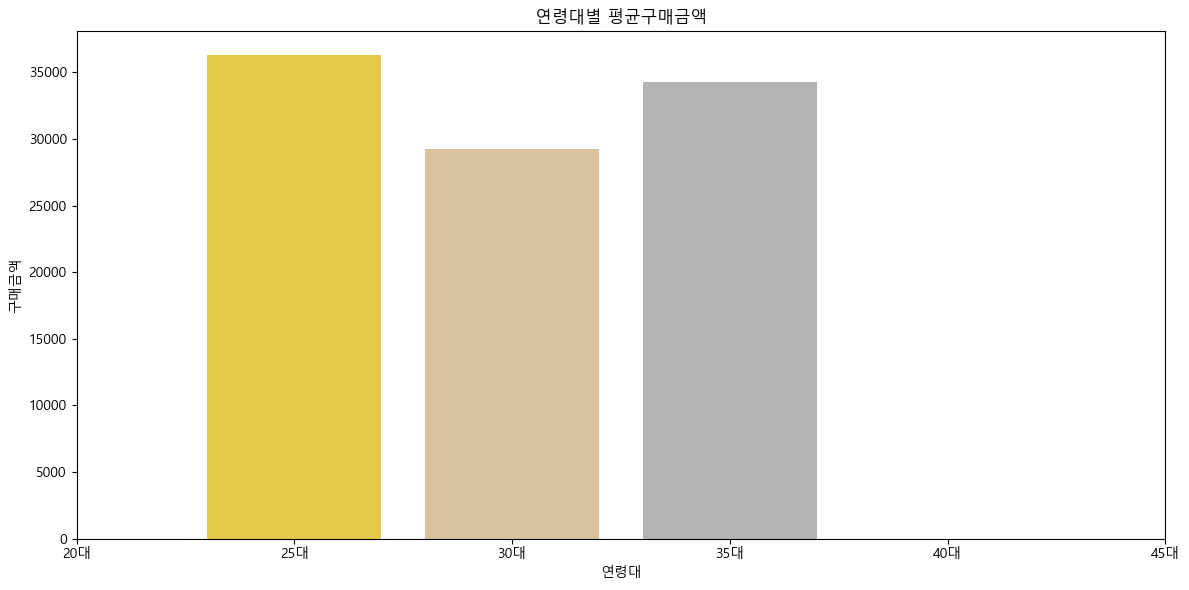

In [105]:
plt.figure(figsize = (12,6))
sns.barplot(
    data = avg_purcahse_by_agegroup, 
    x = '연령대',
    y = '구매금액',
    palette = 'Set2'
)

plt.title('연령대별 평균구매금액')
plt.xlabel('연령대')
plt.ylabel('구매금액')
plt.xlim(4, 9)
plt.tight_layout()
plt.show()

C:\Users\kelly\AppData\Local\Temp\ipykernel_37876\9287829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


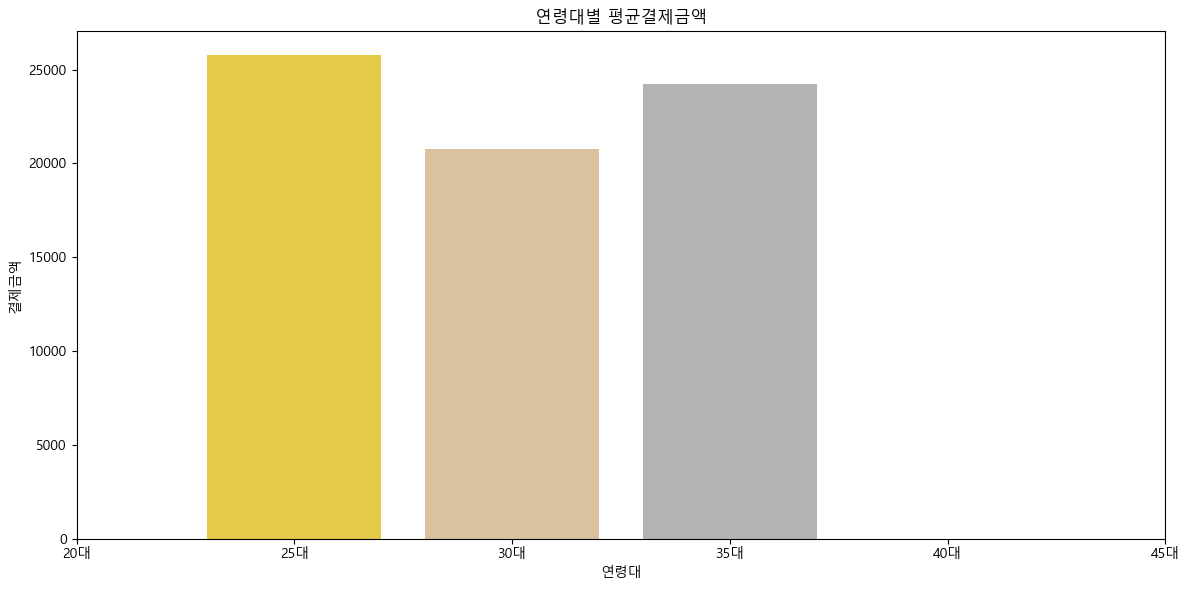

In [101]:
plt.figure(figsize = (12,6))
sns.barplot(
    data = avg_payment_by_agegroup, 
    x = '연령대',
    y = '결제금액',
    palette = 'Set2'
)

plt.title('연령대별 평균결제금액')
plt.xlabel('연령대')
plt.ylabel('결제금액')
plt.xlim(4, 9)
plt.tight_layout()
plt.show()

# 필수 문제 끝

-----

# (선택 사항)

## 아래는 CRM(Customer Relationship Management) 데이터에서 주로 사용하는 RFM 분석에 대한 설명이다.


#### RFM 분석은 고객 세분화를 위한 효과적인 도구로 사용되는 마케팅 분석 방법이다.

- RFM은 Recency(최근성), Frequency(빈도), Monetary(금액)의 약어로, 이 세 가지 요소를 기반으로 고객을 분류하고 타겟팅하는 방법

- Recency(최근성): 고객이 얼마나 최근에 구매를 했는지 (Recency 값이 낮으면 자주 방문하는 고객)
- Frequency(빈도): 고객이 일정 기간 동안 얼마나 자주 구매를 하는지
- Monetary(금액): 고객이 일정 기간 동안 얼마나 많은 금액을 소비했는지
- 각 R / F / M 값을 계산하여, 최종점수를 합산 -> 합산된 점수를 이용해 고객 분할

### 분석을 통해 나온 각 고객 세그먼트 별로 차별화 전략을 수립 ! 

### **문제에 정답은 없으며, 아래 예시를 참고하여 자유롭게 분석을 진행하시면 됩니다.**

## 예시
RFM 분석 기준
1. Recency (최근성) - 고객별 마지막 구매일(구매일)로부터 기준일(2023-12-31)까지의 경과 일수를 계산.
2. Frequency (빈도) - 고객별 총 구매 횟수(주문번호)를 기준으로 집계.
3. Monetary (금액) - 고객별 총 구매 금액(구매금액)을 기준으로 집계.
  

4. RFM 점수  

RFM 점수 합계: R_Score + F_Score + M_Score로 계산.
3개 그룹으로 분류 (pd.cut 사용):
0~3: "이탈 가능성 높은 고객"
4~6: "일반 고객"
7~9: "가장 가치 있는 고객"  

5. 고객 세분화 및 마케팅 전략
그룹별로 고객 수(Customer_Count)와 평균 Recency, Frequency, Monetary 값을 분석.
각 그룹에 적합한 마케팅 전략 매핑: (예시)

## 예시 코드

In [45]:
# 라이브러리 import
#import pandas as pd

# pd.to_datetime 사용 
# sales_data['구매일'] = pd.to_datetime(sales_data['구매일'])  # Convert '구매일' to datetime
# analysis_date = pd.Timestamp('2023-12-31')  # Analysis reference date


# Step 1: RFM 값 계산
#rfm = sales_data.groupby('ID').agg({
#    '구매일': lambda x: (analysis_date - x.max()).days,  # Recency
#    '주문번호': 'count',  # Frequency
#    '구매금액': 'sum'  # Monetary
#}).rename(columns={'구매일': 'Recency', '주문번호': 'Frequency', '구매금액': 'Monetary'})


# Step 2: pd.cut 사용해서 rfm분류
#rfm['R_Score'] = pd.cut(rfm['Recency'], bins=3, labels=[3, 2, 1])
#rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=3, labels=[1, 2, 3])
#rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=3, labels=[1, 2, 3])


# Step 3: 종합 RFM 점수 계산
#rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].sum(axis=1).astype(int)


# Step 4: 고객 세그멘테이션
#rfm['Customer_Group'] = pd.cut(
#    rfm['RFM_Score'],
#    bins=[0, 3, 6, 9],
#    labels=['이탈 가능성 높은 고객', '일반 고객', '가장 가치 있는 고객']
#)


# Step 5: 요약 및 결론
#group_summary = rfm.groupby('Customer_Group').agg({
#    'Recency': 'mean',
#    'Frequency': 'mean',
#    'Monetary': 'mean',
#    'RFM_Score': 'count'
#}).rename(columns={'RFM_Score': 'Customer_Count'})


# Step 6: 고객 별 어떠한 전략 적용?
#strategy_mapping_adjusted = {
#    '가장 가치 있는 고객': 'VIP 전용 혜택 제공 및 충성도 강화',
#    '일반 고객': '할인 쿠폰 제공으로 재구매 유도',
#    '이탈 가능성 높은 고객': '이탈 방지 캠페인 및 맞춤형 리마케팅 진행'
#}
#group_summary['Marketing_Strategy'] = group_summary.index.map(strategy_mapping_adjusted)

# 결과 출력
#group_summary['Marketing_Strategy'] = group_summary.index.map(strategy_mapping_adjusted)
#print(group_summary)

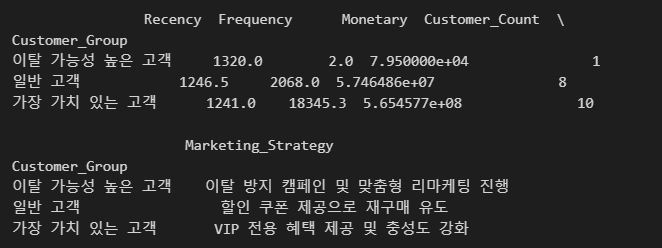

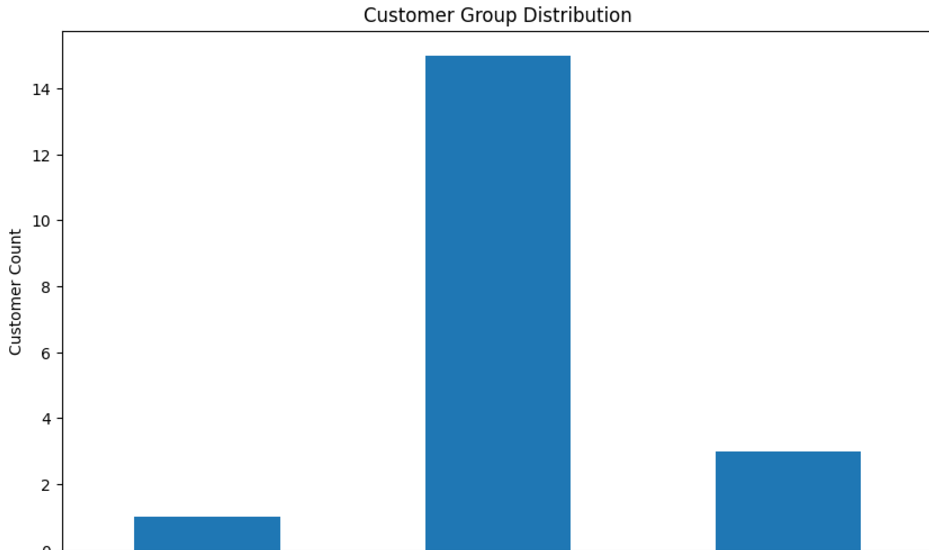